Fast Fourier Transform
======================

This example shows how to compute a FFT of a signal using the scipy
Scientific Python package.


In [1]:


import numpy as np

from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt




We will first compute the spectrum of the sum of two sinusoidal
waveforms.


Text(0, 0.5, 'Amplitude')

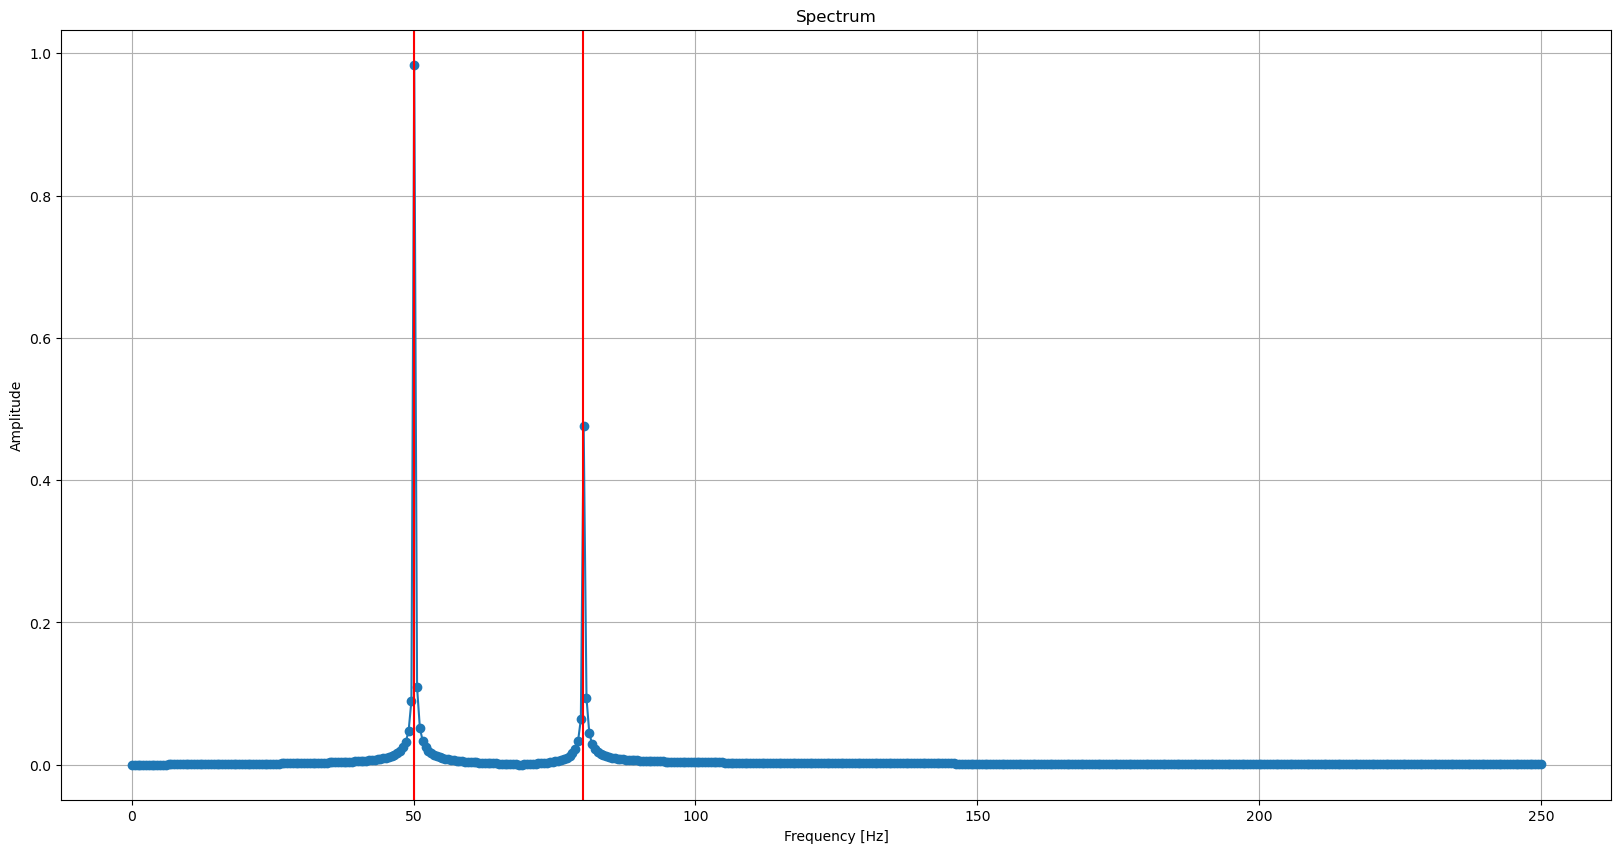

In [2]:

N = 1000 # number of sample points
dt = 1. / 500 # sample spacing

frequency1 = 50.
frequency2 = 80.

t = np.linspace(0.0, N*dt, N)
y = np.sin(2*np.pi * frequency1 * t) + .5 * np.sin(2*np.pi * frequency2 * t)

yf = fft(y)
tf = np.linspace(.0, 1./(2.*dt), N//2)
spectrum = 2./N * np.abs(yf[0:N//2])

figure1, ax = plt.subplots(figsize=(20, 10))

ax.plot(tf, spectrum, 'o-')
ax.grid()
for frequency in frequency1, frequency2:
    ax.axvline(x=frequency, color='red')
ax.set_title('Spectrum')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')



Now we will compute the spectrum of a square waveform.

The Fourier series is given by:

$$\frac{4}{\pi} \sum_{n=1, 3, 5, \ldots}^{\inf} \frac{1}{n} \sin(n 2\pi f t)$$


Text(0, 0.5, 'Amplitude')

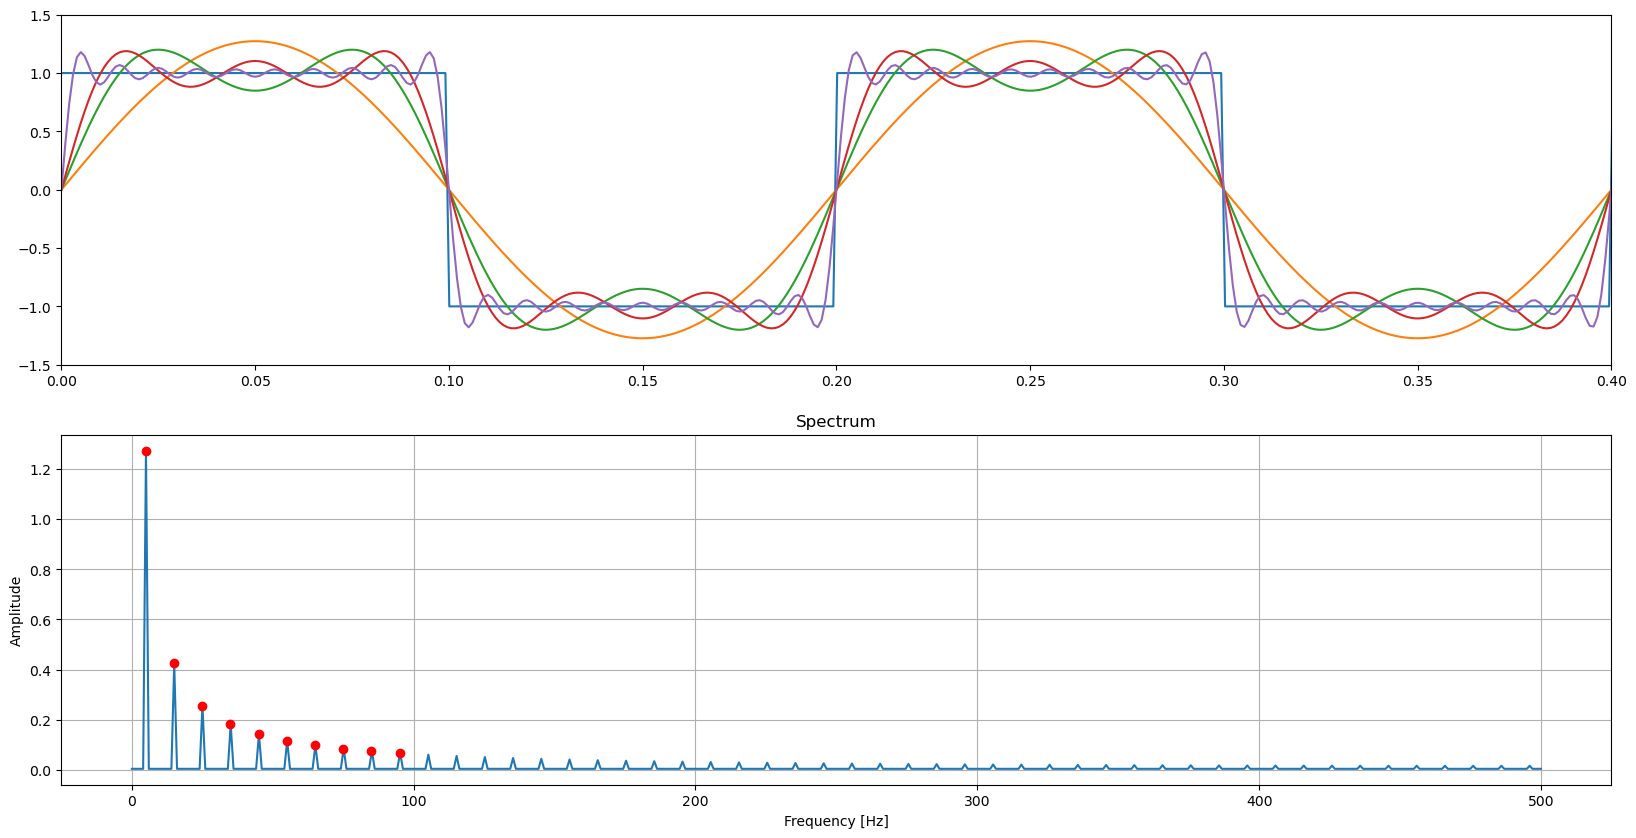

In [3]:

N = 1000 # number of sample points
dt = 1. / 1000 # sample spacing

frequency = 5.

t = np.linspace(.0, N*dt, N)
y = signal.square(2*np.pi*frequency*t)

figure2, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

ax1.plot(t, y)
y_sum = None
for n in range(1, 20, 2):
    yn = 4/(np.pi*n)*np.sin((2*np.pi*n*frequency*t))
    if y_sum is None:
        y_sum = yn
    else:
        y_sum += yn
    if n in (1, 3, 5):
        ax1.plot(t, y_sum)
ax1.plot(t, y_sum)
ax1.set_xlim(0, 2/frequency)
ax1.set_ylim(-1.5, 1.5)

yf = fft(y)
tf = np.linspace(.0, 1./(2.*dt), N//2)
spectrum = 2./N * np.abs(yf[0:N//2])

ax2.plot(tf, spectrum)
n = np.arange(1, 20, 2)
ax2.plot(n*frequency, 4/(np.pi*n), 'o', color='red')
ax2.grid()
ax2.set_title('Spectrum')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')

